In [1]:
library(e1071)
library(ggplot2)
library(pROC)
library(ROCR)
library(ISLR)
library(leaps)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
# load the data and gives the names to the column 
CreditData <- read.csv('german.data',sep=" ",header=FALSE)
names(CreditData) = c('Account_status','Duration','Cre_history','Purpose',
                      'Cre_amount','Savings','Present_employment','Installment_rate_income',
                      'Personal_status','Other_debtors','Present_residence','Property','Age',
                      'Installment_plans','Housing','No._credits','Job','No._people','Tel',
                      'Foreign_worker','C_Risk')

In [3]:
CreditData$C_Risk[CreditData$C_Risk=='1'] <- 1 # Good in Credit
CreditData$C_Risk[CreditData$C_Risk=='2'] <- 0 # Bad in Credit
CreditData$C_Risk <- factor(CreditData$C_Risk)
# Divide the data into two parts
CreditData_training <- CreditData[1:800,]
CreditData_testing <- CreditData[801:1000,]

head(CreditData_training)

Account_status,Duration,Cre_history,Purpose,Cre_amount,Savings,Present_employment,Installment_rate_income,Personal_status,Other_debtors,⋯,Property,Age,Installment_plans,Housing,No._credits,Job,No._people,Tel,Foreign_worker,C_Risk
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,0
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,0
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1


In [4]:
# create logistic regression using all predictors
model_logistic <- glm(C_Risk~.,data = CreditData_training,family = binomial)
summary(model_logistic)


Call:
glm(formula = C_Risk ~ ., family = binomial, data = CreditData_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5591  -0.6663   0.3604   0.6979   2.7373  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -3.978e-01  1.249e+00  -0.318 0.750139    
Account_statusA12        2.701e-01  2.437e-01   1.108 0.267784    
Account_statusA13        9.306e-01  4.018e-01   2.316 0.020567 *  
Account_statusA14        1.737e+00  2.686e-01   6.465 1.02e-10 ***
Duration                -2.893e-02  1.042e-02  -2.777 0.005479 ** 
Cre_historyA31          -2.255e-01  6.289e-01  -0.359 0.719936    
Cre_historyA32           7.639e-01  4.753e-01   1.607 0.108022    
Cre_historyA33           9.172e-01  5.233e-01   1.753 0.079627 .  
Cre_historyA34           1.487e+00  4.907e-01   3.031 0.002440 ** 
PurposeA41               1.832e+00  4.425e-01   4.141 3.46e-05 ***
PurposeA410              1.413e+00  8.263e-01   1.710 

In [5]:
# Calculate the confusion matrix
confusion.matrix <- as.matrix(table('Actual'=model_logistic$y, 'Prediction'=round(model_logistic$fitted.values)))
confusion.matrix

      Prediction
Actual   0   1
     0 126 113
     1  59 502

In [6]:
N <- nrow(CreditData_training)  # number of observations
diag <- diag(confusion.matrix)  # TN and TP
Accuracy <- sum(diag)/N         # accuracy = (TP + TN)/N 
round(Accuracy*100,2)

[1] 78.5

In [7]:
rowsums = apply(confusion.matrix, 1, sum)	# number of observations per class
colsums = apply(confusion.matrix, 2, sum)	# number of predictions per class
Actual.Dist = rowsums / N					# distribution of observations over the actual classes
Predicted.Dist= colsums / N					# distribution of observations over the predicted classes
round(data.frame(Actual.Dist,Predicted.Dist)*100,2)

,Actual.Dist,Predicted.Dist
0,29.88,23.12
1,70.12,76.88


In [8]:
Precision = diag / colsums
Recall = diag / rowsums
F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall, F1, Actual.Dist, Predicted.Dist)*100,2)

,Precision,Recall,F1,Actual.Dist,Predicted.Dist
0,68.11,52.72,59.43,29.88,23.12
1,81.63,89.48,85.37,70.12,76.88


In [9]:
# Create the Naivebayes with all predictors
model_naiveBayes <- naiveBayes(C_Risk ~ ., data = CreditData_training)
model_naiveBayes


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      0       1 
0.29875 0.70125 

Conditional probabilities:
   Account_status
Y          A11        A12        A13        A14
  0 0.41422594 0.38912134 0.05020921 0.14644351
  1 0.19607843 0.23707665 0.07664884 0.49019608

   Duration
Y       [,1]     [,2]
  0 24.55649 13.27805
  1 18.98752 11.25317

   Cre_history
Y          A30        A31        A32        A33        A34
  0 0.08368201 0.08786611 0.54811715 0.10041841 0.17991632
  1 0.02317291 0.02852050 0.52228164 0.08377897 0.34224599

   Purpose
Y          A40        A41       A410        A42        A43        A44
  0 0.29707113 0.05020921 0.01673640 0.18828452 0.20920502 0.01255230
  1 0.20142602 0.12299465 0.01069519 0.17647059 0.30837790 0.01069519
   Purpose
Y          A45        A46        A48        A49
  0 0.02928870 0.08368201 0.00418410 0.10878661
  1 0.02139037 0.04456328 0.01247772 0.09

In [10]:
# Create the confusion matrix for naiveBayes
nb_train_predict <- predict(model_naiveBayes, CreditData_training)
nb_matrix<-table('Actual'=nb_train_predict, 'Prediction'=CreditData_training$C_Risk)
nb_matrix

      Prediction
Actual   0   1
     0 131  75
     1 108 486

In [11]:
N <- nrow(CreditData_training)  # number of observations
diag <- diag(nb_matrix)  # TN and TP
Accuracy <- sum(diag)/N         # accuracy = (TP + TN)/N 
round(Accuracy*100,2)

[1] 77.12

In [12]:
rowsums = apply(nb_matrix, 1, sum)	# number of observations per class
colsums = apply(nb_matrix, 2, sum)	# number of predictions per class
Actual.Dist = rowsums / N					# distribution of observations over the actual classes
Predicted.Dist= colsums / N					# distribution of observations over the predicted classes
round(data.frame(Actual.Dist,Predicted.Dist)*100,2)

,Actual.Dist,Predicted.Dist
0,25.75,29.88
1,74.25,70.12


In [13]:
Precision = diag / colsums
Recall = diag / rowsums
F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall, F1, Actual.Dist, Predicted.Dist)*100,2)

,Precision,Recall,F1,Actual.Dist,Predicted.Dist
0,54.81,63.59,58.88,25.75,29.88
1,86.63,81.82,84.16,74.25,70.12


(Intercept)       Account_statusA12       Account_statusA13 
           1.589803e+00            7.280822e-02            1.976900e-01 
      Account_statusA14                Duration          Cre_historyA31 
           2.986198e-01           -4.502325e-03           -1.892877e-01 
         Cre_historyA34              PurposeA41              PurposeA42 
           9.771048e-02            2.110721e-01            9.772396e-02 
             PurposeA43              PurposeA48              Cre_amount 
           1.087209e-01            2.609881e-01           -1.862044e-05 
             SavingsA64              SavingsA65   Present_employmentA74 
           1.381794e-01            7.948043e-02            1.179782e-01 
Installment_rate_income      Personal_statusA93       Other_debtorsA103 
          -5.444883e-02            1.025824e-01            1.707010e-01 
                    Age             HousingA152             No._credits 
           2.860033e-03            5.989522e-02           -4.830026e-02

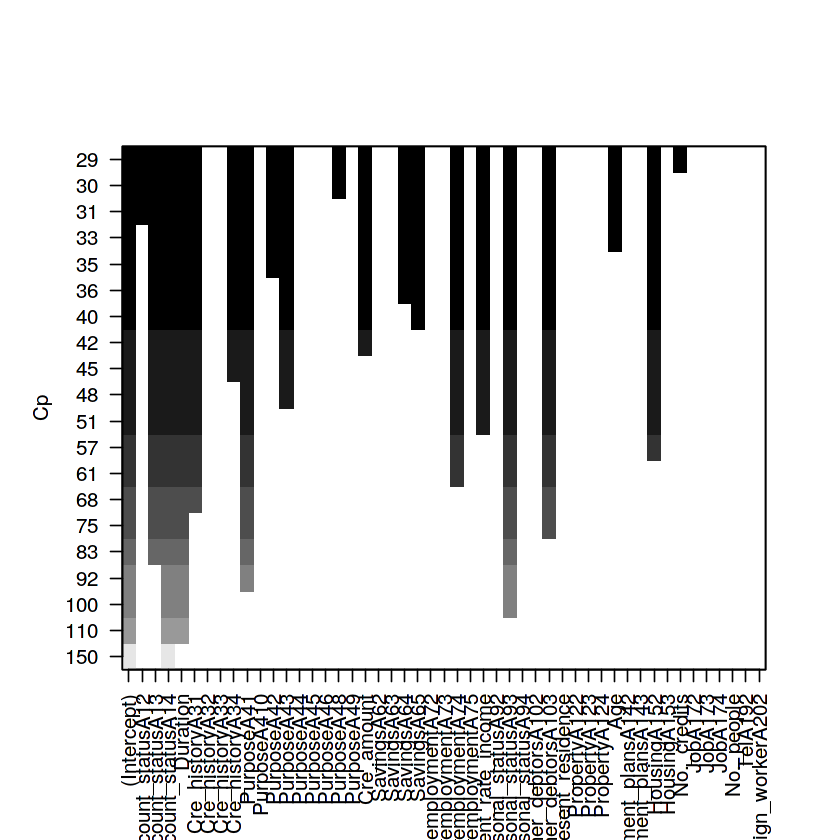

In [14]:
# Apply the forward and backward seletion, use codf funtion to find the predictors according to cp.
regfit.fwd<-regsubsets(C_Risk~.,data = CreditData_training,nvmax=20,method='forward')
plot(regfit.fwd,scale='Cp')
coef(regfit.fwd,which.min(summary(regfit.fwd)$cp))

(Intercept)       Account_statusA13       Account_statusA14 
           1.494130e+00            1.577858e-01            2.546276e-01 
               Duration          Cre_historyA32          Cre_historyA33 
          -4.836513e-03            1.942234e-01            1.924607e-01 
         Cre_historyA34              PurposeA41              PurposeA42 
           2.607379e-01            2.245209e-01            1.089571e-01 
             PurposeA43              PurposeA48              PurposeA49 
           1.368164e-01            3.196725e-01            1.192375e-01 
             Cre_amount              SavingsA64              SavingsA65 
          -1.822976e-05            1.413958e-01            8.591825e-02 
  Present_employmentA74 Installment_rate_income      Personal_statusA93 
           1.102961e-01           -5.653634e-02            1.218966e-01 
      Other_debtorsA103                     Age              No._people 
           1.828329e-01            2.721025e-03           -7.237507e-02

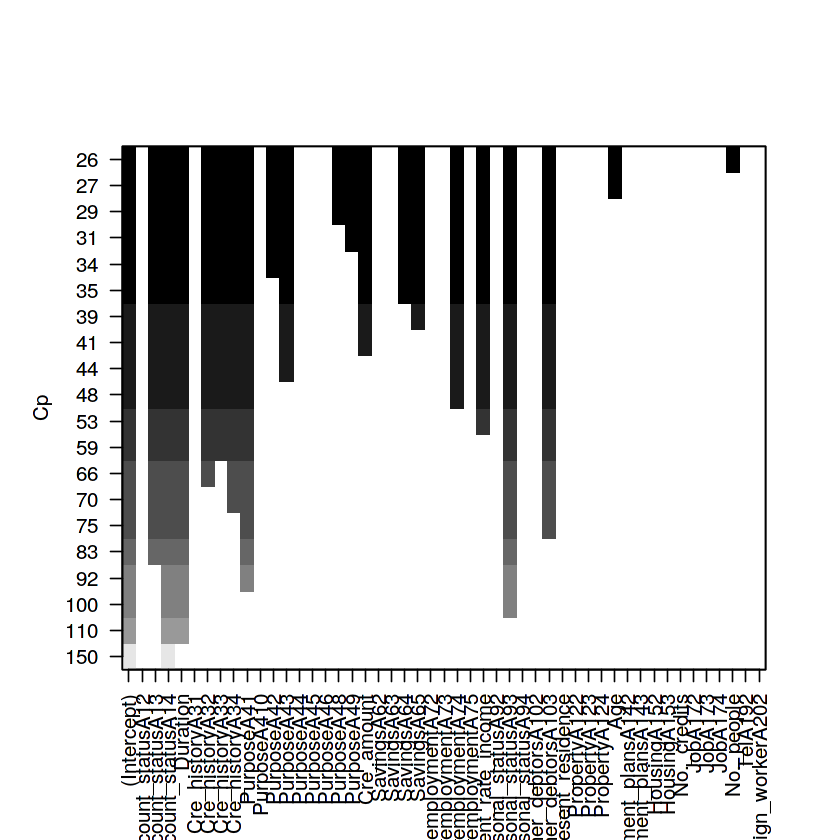

In [15]:
regfit.bwd<-regsubsets(C_Risk~.,data = CreditData_training,nvmax=20,method='backward')
plot(regfit.bwd,scale='Cp')
coef(regfit.bwd,which.min(summary(regfit.bwd)$cp))

In [16]:
#Build the regression with a subset of the predictors.
model_logistic_ty <- glm(C_Risk~Account_status+Duration+Cre_history+Purpose+Cre_amount+Savings+
                         Present_employment+Installment_rate_income+Personal_status+Other_debtors+Age+
                         No._people+Housing+No._credits,data= CreditData_training,family = binomial)
summary(model_logistic_ty)


Call:
glm(formula = C_Risk ~ Account_status + Duration + Cre_history + 
    Purpose + Cre_amount + Savings + Present_employment + Installment_rate_income + 
    Personal_status + Other_debtors + Age + No._people + Housing + 
    No._credits, family = binomial, data = CreditData_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6324  -0.6781   0.3806   0.7179   2.8515  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -5.324e-01  1.007e+00  -0.528  0.59719    
Account_statusA12        2.237e-01  2.363e-01   0.947  0.34380    
Account_statusA13        9.208e-01  3.938e-01   2.338  0.01936 *  
Account_statusA14        1.703e+00  2.629e-01   6.477 9.38e-11 ***
Duration                -3.169e-02  1.005e-02  -3.154  0.00161 ** 
Cre_historyA31          -3.979e-01  6.014e-01  -0.662  0.50817    
Cre_historyA32           8.070e-01  4.674e-01   1.727  0.08422 .  
Cre_historyA33           8.943e-01  5.161e-01

In [17]:
confusion.matrix.ty <- as.matrix(table('Actual'=model_logistic_ty$y, 'Prediction'=round(model_logistic_ty$fitted.values)))
confusion.matrix.ty

      Prediction
Actual   0   1
     0 132 107
     1  55 506

In [18]:
N <- nrow(CreditData_training)  # number of observations
diag <- diag(confusion.matrix.ty)  # TN and TP
Accuracy <- sum(diag)/N         # accuracy = (TP + TN)/N 
round(Accuracy*100,2)

[1] 79.75

In [19]:
rowsums = apply(confusion.matrix.ty, 1, sum)	# number of observations per class
colsums = apply(confusion.matrix.ty, 2, sum)	# number of predictions per class
Actual.Dist = rowsums / N					# distribution of observations over the actual classes
Predicted.Dist= colsums / N					# distribution of observations over the predicted classes
round(data.frame(Actual.Dist,Predicted.Dist)*100,2)

,Actual.Dist,Predicted.Dist
0,29.88,23.38
1,70.12,76.62


In [20]:
Precision = diag / colsums
Recall = diag / rowsums
F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall, F1, Actual.Dist, Predicted.Dist)*100,2)

,Precision,Recall,F1,Actual.Dist,Predicted.Dist
0,70.59,55.23,61.97,29.88,23.38
1,82.54,90.20,86.20,70.12,76.62


In [21]:
# Now we will also apply our new subset of predictors into NaiveBayes model
model_naiveBayes_ty <- naiveBayes(C_Risk ~ Account_status+Duration+Cre_history+Purpose+Cre_amount+Savings+
                         Present_employment+Installment_rate_income+Personal_status+Other_debtors+Age+
                         No._people+Housing+No._credits, data = CreditData_training,usekernel=T)

model_naiveBayes_ty


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, usekernel = ..1)

A-priori probabilities:
Y
      0       1 
0.29875 0.70125 

Conditional probabilities:
   Account_status
Y          A11        A12        A13        A14
  0 0.41422594 0.38912134 0.05020921 0.14644351
  1 0.19607843 0.23707665 0.07664884 0.49019608

   Duration
Y       [,1]     [,2]
  0 24.55649 13.27805
  1 18.98752 11.25317

   Cre_history
Y          A30        A31        A32        A33        A34
  0 0.08368201 0.08786611 0.54811715 0.10041841 0.17991632
  1 0.02317291 0.02852050 0.52228164 0.08377897 0.34224599

   Purpose
Y          A40        A41       A410        A42        A43        A44
  0 0.29707113 0.05020921 0.01673640 0.18828452 0.20920502 0.01255230
  1 0.20142602 0.12299465 0.01069519 0.17647059 0.30837790 0.01069519
   Purpose
Y          A45        A46        A48        A49
  0 0.02928870 0.08368201 0.00418410 0.10878661
  1 0.02139037 0.0445632

In [23]:
# Create the confusion matrix for naiveBayes
nb_train_predict <- predict(model_naiveBayes_ty, CreditData_training)
nb_matrix_ty<-table('Actual'=nb_train_predict, 'Prediction'=CreditData_training$C_Risk)
#nb_matrix <- confusionMatrix(table(nb_train_predict, CreditData_training$C_Risk))
nb_matrix_ty

      Prediction
Actual   0   1
     0 130  68
     1 109 493

In [24]:
N <- nrow(CreditData_training)  # number of observations
diag <- diag(nb_matrix_ty)  # TN and TP
Accuracy <- sum(diag)/N         # accuracy = (TP + TN)/N 
round(Accuracy*100,2)

[1] 77.88

In [25]:
rowsums = apply(nb_matrix_ty, 1, sum)	# number of observations per class
colsums = apply(nb_matrix_ty, 2, sum)	# number of predictions per class
Actual.Dist = rowsums / N					# distribution of observations over the actual classes
Predicted.Dist= colsums / N					# distribution of observations over the predicted classes
round(data.frame(Actual.Dist,Predicted.Dist)*100,2)

,Actual.Dist,Predicted.Dist
0,24.75,29.88
1,75.25,70.12


In [26]:
Precision = diag / colsums
Recall = diag / rowsums
F1 = 2 * Precision * Recall / (Precision + Recall) 
round(data.frame(Precision, Recall, F1, Actual.Dist, Predicted.Dist)*100,2)

,Precision,Recall,F1,Actual.Dist,Predicted.Dist
0,54.39,65.66,59.50,24.75,29.88
1,87.88,81.89,84.78,75.25,70.12


[1] 0.7805166

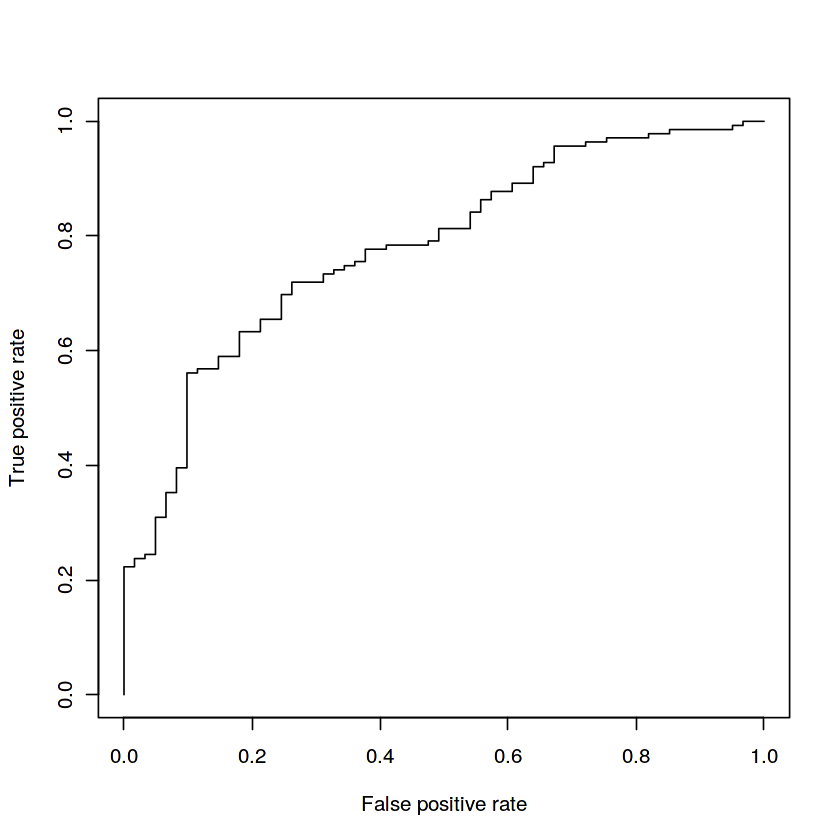

In [27]:
# build the ROC curve and the AUC for new logistic model
p <- predict(model_logistic_ty, newdata=CreditData_testing)
pr <- prediction(p, CreditData_testing$C_Risk)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.7951409

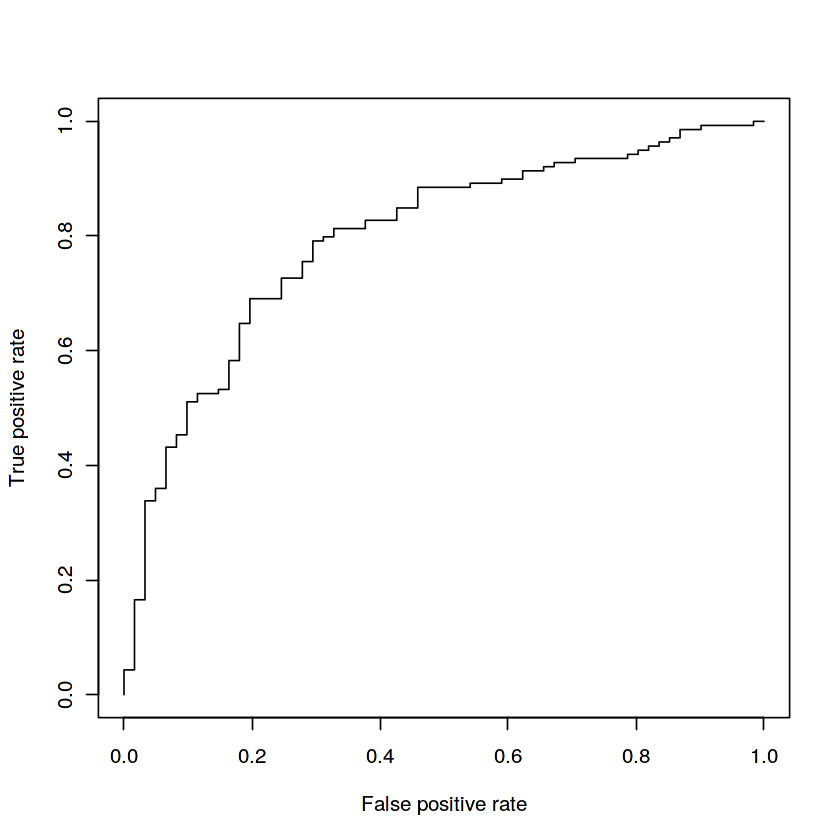

In [28]:
# build the ROC curve and the AUC for new naiveBayes model
p <- predict(model_naiveBayes_ty, newdata=CreditData_testing,type='raw')
pr <- prediction(p[,2], CreditData_testing$C_Risk)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc